In [12]:
import pandas as pd
import sys
from io import StringIO

old_stderr = sys.stderr
sys.stderr = StringIO()

In [21]:
PETROL_FILE_PATH = '../../../volza/petroleum/petrol_crude_oil_spot_price.csv'

petrol_df = pd.read_csv(PETROL_FILE_PATH, delimiter=';', on_bad_lines='warn')
petrol_df['Date'] = pd.to_datetime(petrol_df['Date'])

# Split based on types of oil
brent_df = petrol_df[petrol_df['product-name']=='UK Brent Crude Oil']
wti_df = petrol_df[petrol_df['product-name']=='WTI Crude Oil']

brent_df.rename(columns={'Value':'Brent Oil Value'}, inplace=True)
wti_df.rename(columns={'Value':'WTI Oil Value'}, inplace=True)

brent_df.head(2)

C:\Users\manim\AppData\Local\Temp\ipykernel_44556\2583433906.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brent_df.rename(columns={'Value':'Brent Oil Value'}, inplace=True)
C:\Users\manim\AppData\Local\Temp\ipykernel_44556\2583433906.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wti_df.rename(columns={'Value':'WTI Oil Value'}, inplace=True)


,Date,Spot Prices,Brent Oil Value,duoarea,area-name,product,product-name,process,process-name,series
62,1987-05-21,Brent Spot Price (U.S. Dollars per Barrel),18.45,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE
63,1987-05-26,Brent Spot Price (U.S. Dollars per Barrel),18.63,ZEU,NaN,EPCBRENT,UK Brent Crude Oil,PF4,Spot Price FOB,RBRTE


In [14]:
COMBINED_FILE_PATH = '../../../volza/magnesium/magnesium_volza_ais_price.csv'
VOLZA_FILE_PATH = '../../../volza/magnesium/magnesium.csv'

# ****************** List of country codes available in the aligned data (at least for the China export ones) ******************
# COUNTRY_CODES = ['CN' 'BE' 'DE' 'NL' 'SE' 'TR' 'VN' 'MX' 'US' 'IL' 'CL' 'TW' 'ES' 'PL'
#  'RU' 'IN' 'FR' 'GB' 'BG' 'EE' 'IT' 'SI' 'FI' 'IE' 'DK' 'PT' 'LV' 'LT'
#  'HR' 'JP' 'BR' 'MA' 'GH' 'GR' 'RO' 'PA' 'EG' 'CY' 'HK']
 
EXPORT_COUNTRY_CODES = ['CN']
IMPORT_COUNTRY_CODES = ['IN', 'VN', 'BR', 'US']

EXPORT_COUNTRIES = ['China']
IMPORT_COUNTRIES = ['India', 'Vietnam', 'Brazil', 'United States']

try:
    # ****************** Use this if using the aligned dataset ******************
    # combined_df = pd.read_csv(COMBINED_FILE_PATH, delimiter='|', on_bad_lines='warn')
    combined_df = pd.read_csv(VOLZA_FILE_PATH)
except Exception as e:
    print(f"Error reading the CSV file: {e}")
finally:
    # Reset stderr
    sys.stderr.seek(0)
    warnings = sys.stderr.read()
    sys.stderr = old_stderr

# Count the number of bad lines
bad_lines_count = warnings.count('Skipping line')
print(f"Number of bad lines skipped: {bad_lines_count}")

if 'combined_df' in locals():
    combined_df['Date'] = pd.to_datetime(combined_df['Date'], format='mixed')
    combined_df = combined_df.merge(brent_df[['Date', 'Brent Oil Value']], on='Date', how='left')
    combined_df = combined_df.merge(wti_df[['Date', 'WTI Oil Value']], on='Date', how='left')
    combined_df.sort_values('Date', inplace=True)
    combined_df.set_index('Date', inplace=True)

# ****************** Use this if using the aligned dataset ******************
# export_combined_df = combined_df[(combined_df['origin_country_code'].isin(EXPORT_COUNTRY_CODES))]
# import_combined_df = combined_df[(combined_df['destination_country_code'].isin(IMPORT_COUNTRY_CODES))]

export_combined_df = combined_df[(combined_df['Country of Origin'].isin(EXPORT_COUNTRIES))]
import_combined_df = combined_df[(combined_df['Country of Destination'].isin(IMPORT_COUNTRIES))]

# ****************** Just something to check the top importers of products from X country ******************
# check_df = combined_df.groupby('destination_country_code')['Quantity'].sum()
# top_importers = check_df.sort_values(ascending=False).head(3)
# print(top_importers)

# ****************** Use this if using the aligned dataset ******************
# export_group = export_combined_df.groupby('origin_country')
# import_group = import_combined_df.groupby('destination_country')

export_group = export_combined_df.groupby('Country of Origin')
import_group = import_combined_df.groupby('Country of Destination')

import_group.head(2)


Number of bad lines skipped: 0


,Unnamed: 0,HS Code,Product Description,Consignee,Notify Party Name,Shipper,Std. Quantity,Std. Unit,Standard Unit Rate INR,Value,...,Freight Term,Marks Number,HS Product Description,Gross Weight,Consignee Address,Shipper Address,Notify Party Address,Country Name,Brent Oil Value,WTI Oil Value
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1410,81041100,"Magnesium Ingots (magnesium metal, the form of...",JSC Trading Technical Services Long Play,NaN,ANHUI HERRMAN IMPEX CO LTD,5000.0,KGS,-,0.000000,...,-,-,NaN,0.0,NaN,NaN,NaN,Vietnam T3 Import,67.77,61.14
2020-01-01,6418,81041100,"Magnesium 99.9 mg # & unwrought form of bars, ...",ALMINE VIETNAM CO LTD,NaN,ALMINE CO LTD,20000.0,KGS,-,0.000000,...,-,-,NaN,0.0,"Lot 15 Road TS11, Tien Son Industrial Zone, Tu...",NaN,NaN,Vietnam T3 Import,67.77,61.14
2020-01-01,9716,81041100,CONTAINING AT LEAST 99.8% BY WEIGHT OF MAGNESIUM,NaN,NaN,NaN,250800.0,KGS,-,891198.000000,...,-,-,NaN,250800.0,NaN,NaN,NaN,Brazil T1 Import,67.77,61.14
2020-01-01,2492,81041100,CONTAINING AT LEAST 99.8% BY WEIGHT OF MAGNESIUM,NaN,NaN,NaN,24200.0,KGS,-,89659.000000,...,-,-,NaN,24200.0,NaN,NaN,NaN,Brazil T1 Import,67.77,61.14
2020-01-01,5864,81041100,MAGNESIUM >> MAGNESIUM INGOT MAGNESIUM INGOT,EMMENNAR PHARMA PRIVATE LIMITED,NaN,M S SILICA TRADING CO LTD,25000.0,KGS,-,54125.000000,...,-,-,"Magnesium and articles thereof, including wast...",0.0,99/2/1 & 9 MADHUBAN INDUSTRIAL ESTATE MADHUBAN...,"TROPIC ISEL BUILDING, P.O.BOX 438,ROAD TOWN, T...",NaN,India T3 Import,67.77,61.14
2020-01-02,7079,810411,WITH PURE MAGNESIUMHARMLESS IN FORM OF INGOTS ...,Z To Order and NA,Z To Order and NA,Z To Order and NA,20.0,BDL,-,0.000000,...,-,NO MARKS,NaN,19638.0,NaN,NaN,NaN,USA T3+ Import,67.05,61.17
2020-01-02,6439,810411,WITH PURE MAGNESIUMHARMLESS IN FORM OF INGOTS ...,QUALITY LOGISTICS SOLUTION,QUALITY LOGISTICS SOLUTION,QUALITY LOGISTICS MAHLER GBR,20.0,BDL,-,0.000000,...,-,NO MARKS,NaN,19638.0,"4600 34TH ST / ORLANDO 32811, FL,USAPH:(001)56...",DIEDRICH-SPECKMANN-STRASSE 5F|LILIENTHAL NIEDE...,"4600 34TH ST / ORLANDO 32811, FL,USAPH:(001)56...",USA T3+ Import,67.05,61.17
2020-01-03,4676,81041100,MAGNESIUM >> MAGNESIUM INGOT MAGNESIUM INGOT ...,SNAM ALLOYS PVT LTD,NaN,DK METAL WORLD LIMITED,25000.0,KGS,-,52318.087318,...,-,-,"Magnesium and articles thereof, including wast...",0.0,"NO.21E, ATTIBELE INDUSTRIAL ESTATE,ATTIBELE, A...",FLAT 84 15F PRAT MANSON NO.26-36PRAT AVENU...,NaN,India T3 Import,69.08,63.00


### **Analysis**

#### **1. Time Series**
##### **1.1 Exporters**

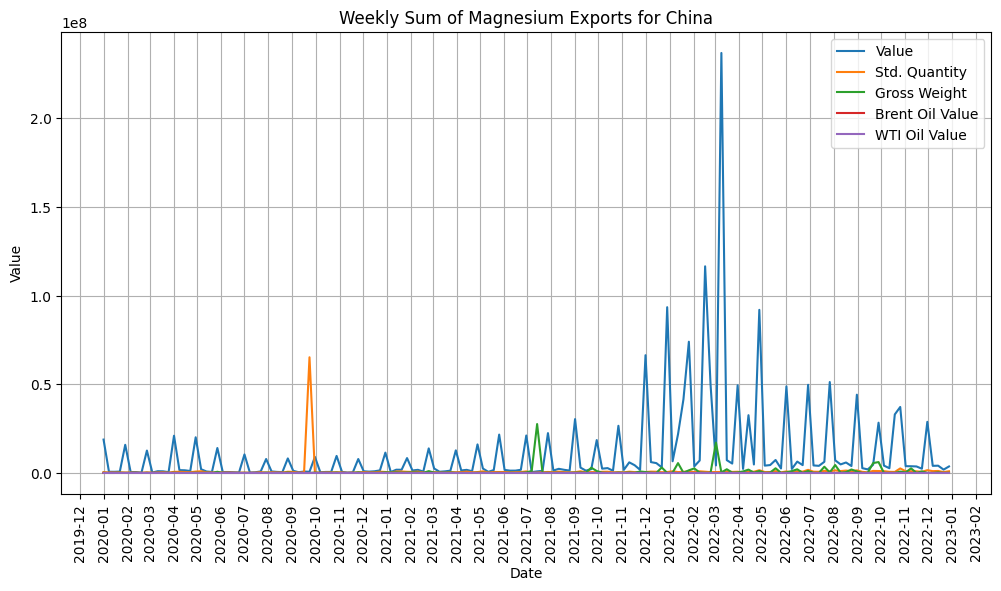

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
NUMERIC_COLUMN = ['Value', 'Std. Quantity', 'Gross Weight', 'Brent Oil Value', 'WTI Oil Value']

for country, group in export_group:

    # Resample and sum
    weekly_data = group[NUMERIC_COLUMN].resample('7D').sum()

    # scaling_factor = 1e1
    # weekly_data['Value'] /= scaling_factor

    # Plotting
    plt.figure(figsize=(12, 6))
    for column in NUMERIC_COLUMN:
        plt.plot(weekly_data.index, weekly_data[column], label=column)

    plt.title(f'Weekly Sum of Magnesium Exports for {country}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.show()

##### **1.2 Importers**

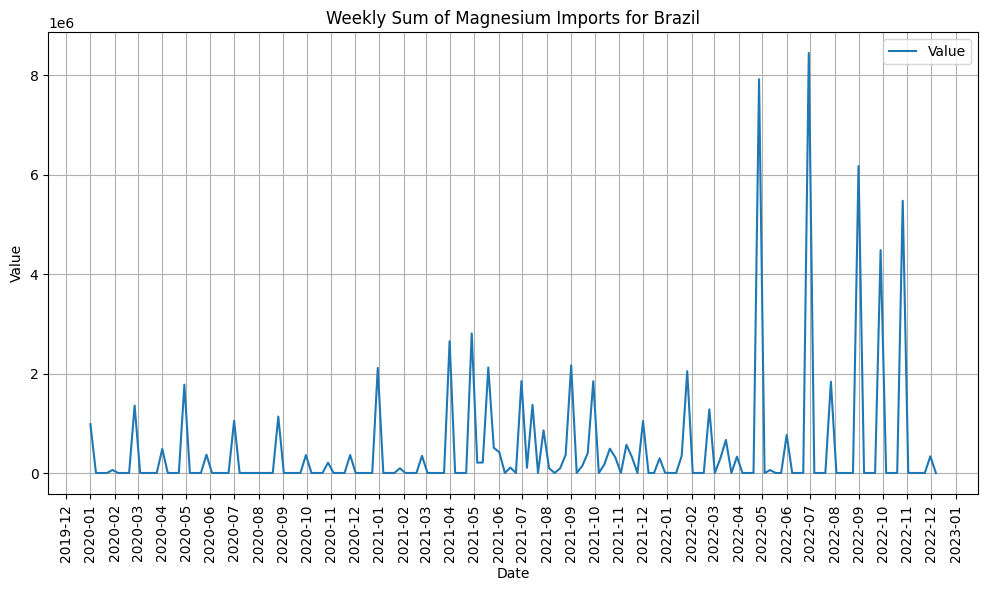

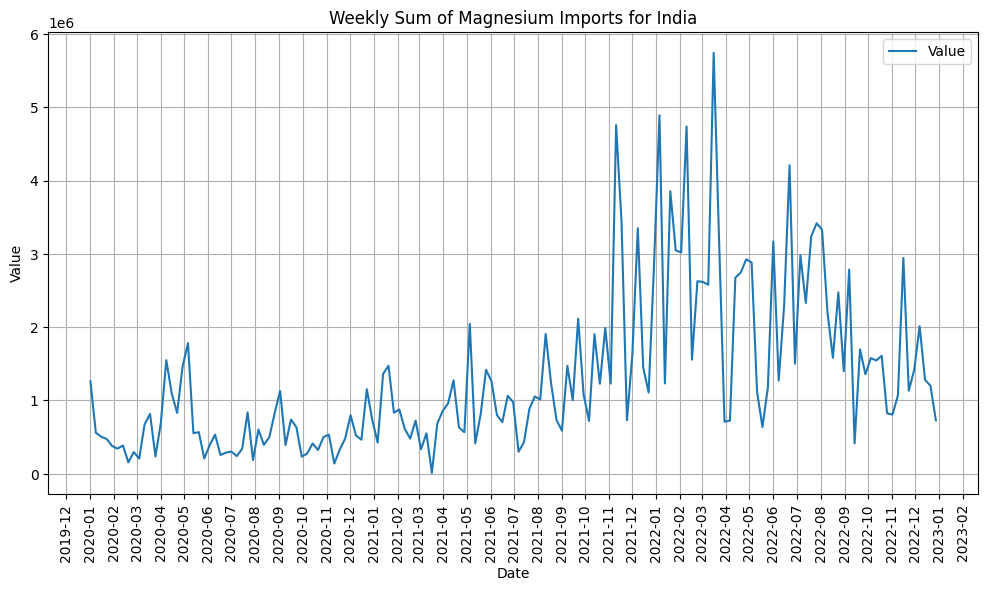

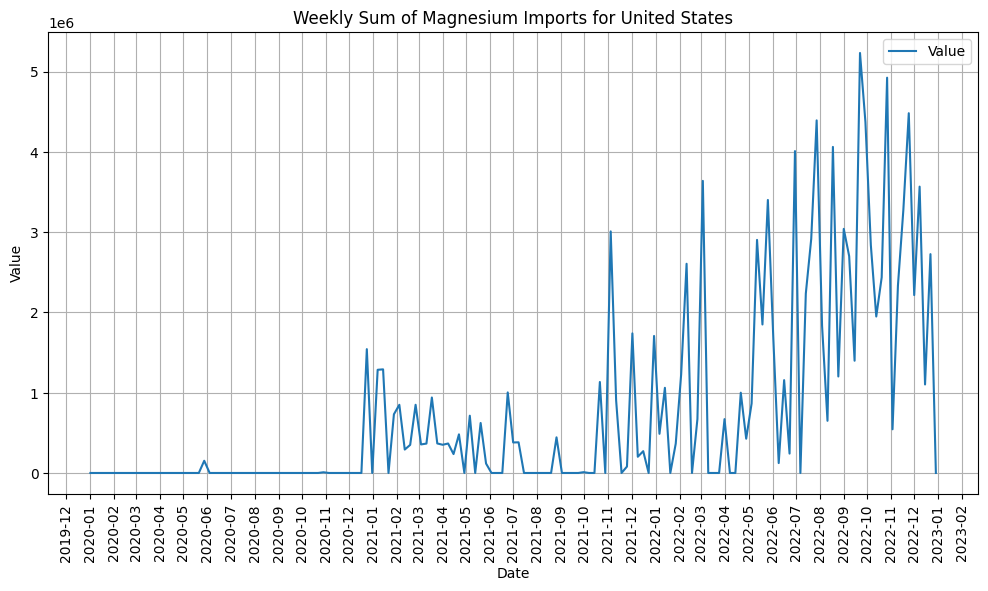

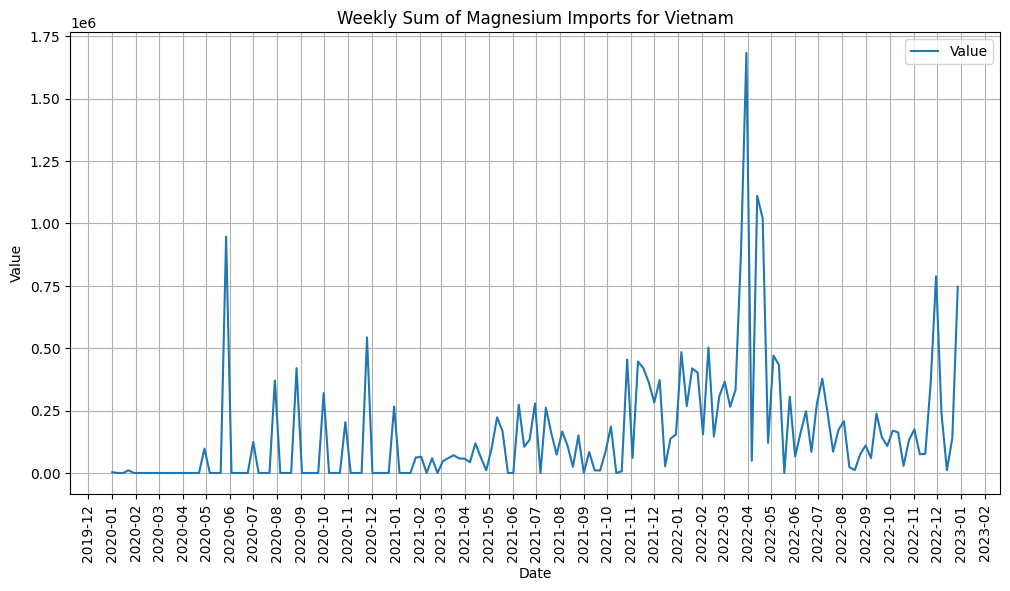

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# NUMERIC_COLUMN = ['Value', 'Std. Quantity', 'Gross Weight']
NUMERIC_COLUMN = ['Value']


for country, group in import_group:

    # Resample and sum
    weekly_data = group[NUMERIC_COLUMN].resample('7D').sum()

    # scaling_factor = 1e1
    # weekly_data['Value'] /= scaling_factor

    # Plotting
    plt.figure(figsize=(12, 6))
    for column in NUMERIC_COLUMN:
        plt.plot(weekly_data.index, weekly_data[column], label=column)

    plt.title(f'Weekly Sum of Magnesium Imports for {country}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=90)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.show()

#### **2. Correlation**
##### **2.1 Times Series Overlay**

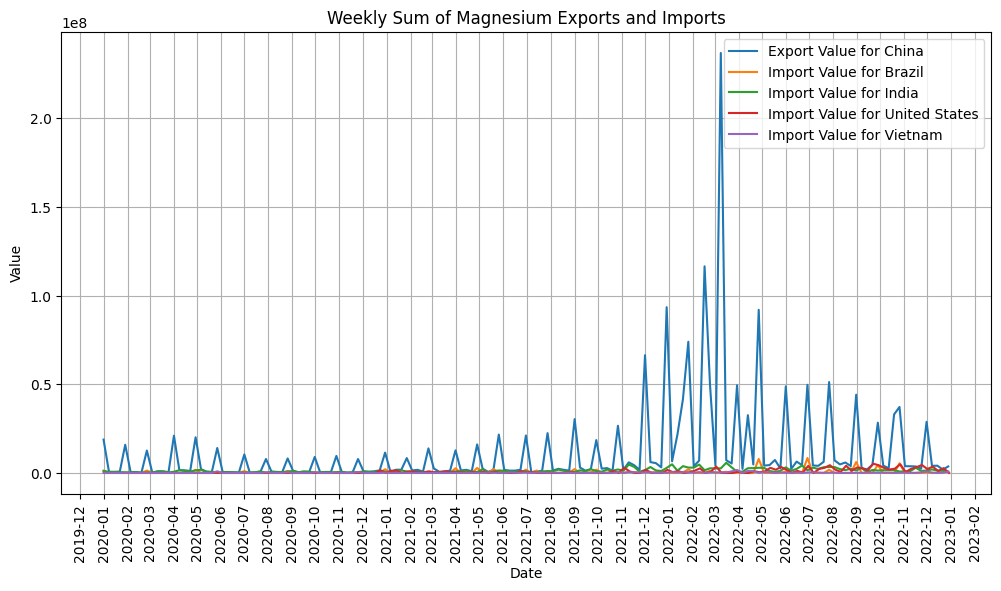

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))

# Plotting for Exporters
for country, group in export_group:
    weekly_data = group['Value'].resample('7D').sum()
    plt.plot(weekly_data.index, weekly_data, label=f'Export Value for {country}')

# Plotting for Importers
for country, group in import_group:
    weekly_data = group['Value'].resample('7D').sum()
    plt.plot(weekly_data.index, weekly_data, label=f'Import Value for {country}')

plt.title(f'Weekly Sum of Magnesium Exports and Imports')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.show()


##### **2.2 Spearman & Pearson Correlation**

Pearson Correlation Coefficient: 0.5899434499700245
Spearman Correlation Coefficient: 0.8555984555984557


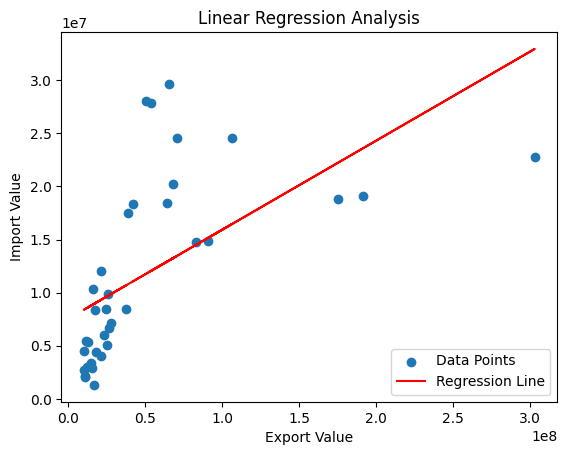

In [18]:
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr\

TIME_METRIC = 'M'

weekly_export = export_combined_df['Value'].resample(TIME_METRIC).sum()
weekly_import = import_combined_df['Value'].resample(TIME_METRIC).sum()

# Merge the two dataframes on the date index
combined_weekly = pd.DataFrame({'Export_Value': weekly_export, 'Import_Value': weekly_import})
combined_weekly.dropna(inplace=True)  

# Correlation Analysis
pearson_corr, _ = pearsonr(combined_weekly['Export_Value'], combined_weekly['Import_Value'])
spearman_corr, _ = spearmanr(combined_weekly['Export_Value'], combined_weekly['Import_Value'])
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"Spearman Correlation Coefficient: {spearman_corr}")

# Regression Analysis
X = combined_weekly['Export_Value']
y = combined_weekly['Import_Value']
X = sm.add_constant(X)  # Add a constant term to the predictor
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
# print(model.summary())

# Plotting the linear regression
plt.scatter(combined_weekly['Export_Value'], combined_weekly['Import_Value'], label='Data Points')
plt.plot(combined_weekly['Export_Value'], predictions, color='red', label='Regression Line')
plt.xlabel('Export Value')
plt.ylabel('Import Value')
plt.title('Linear Regression Analysis')
plt.legend()
plt.show()


Country: Brazil


Pearson Correlation Coefficient: 0.362108333925751
Spearman Correlation Coefficient: 0.5837949256811775


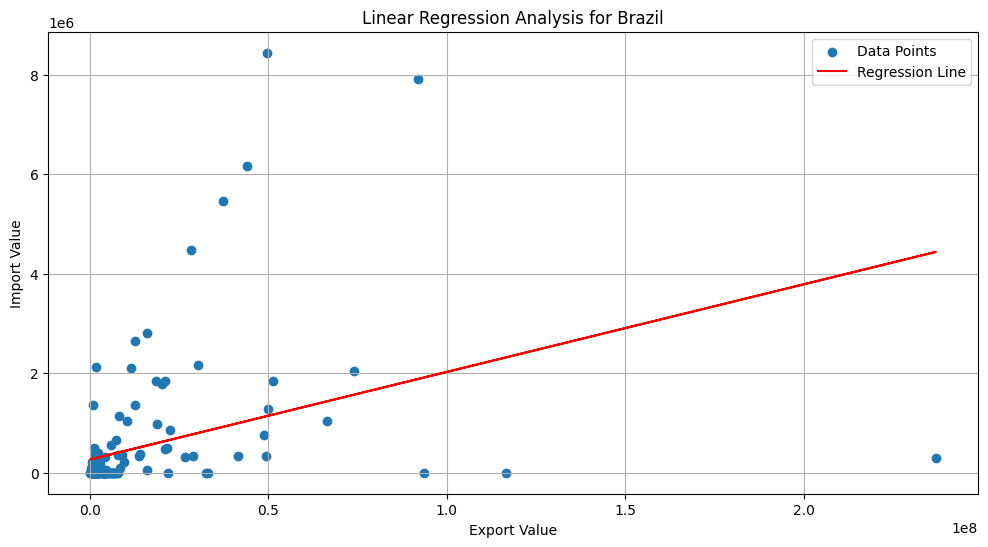

Country: India
Pearson Correlation Coefficient: 0.2672385866514429
Spearman Correlation Coefficient: 0.5855686279374097


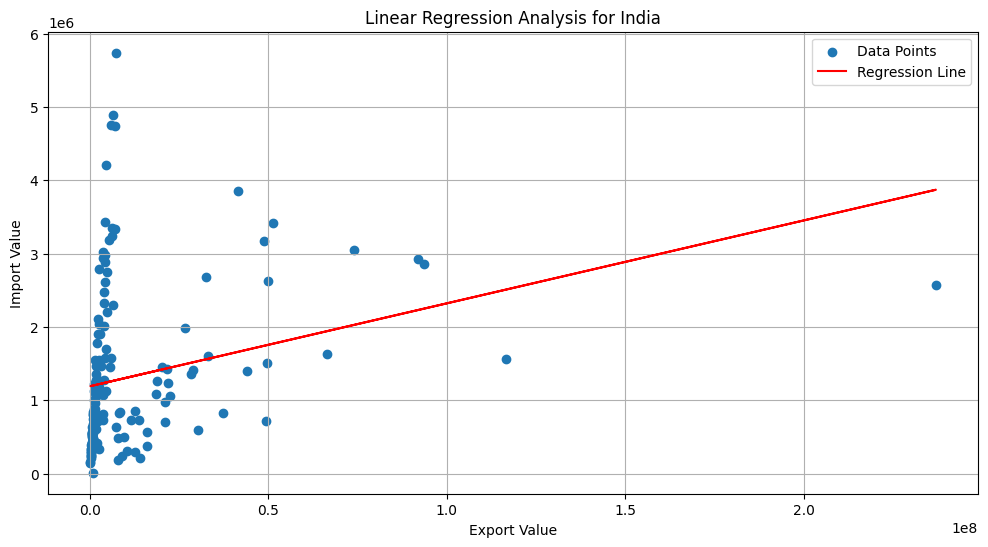

Not enough data for correlation and regression analysis for United States
Country: Vietnam
Pearson Correlation Coefficient: 0.2025387351965952
Spearman Correlation Coefficient: 0.5982141237128186


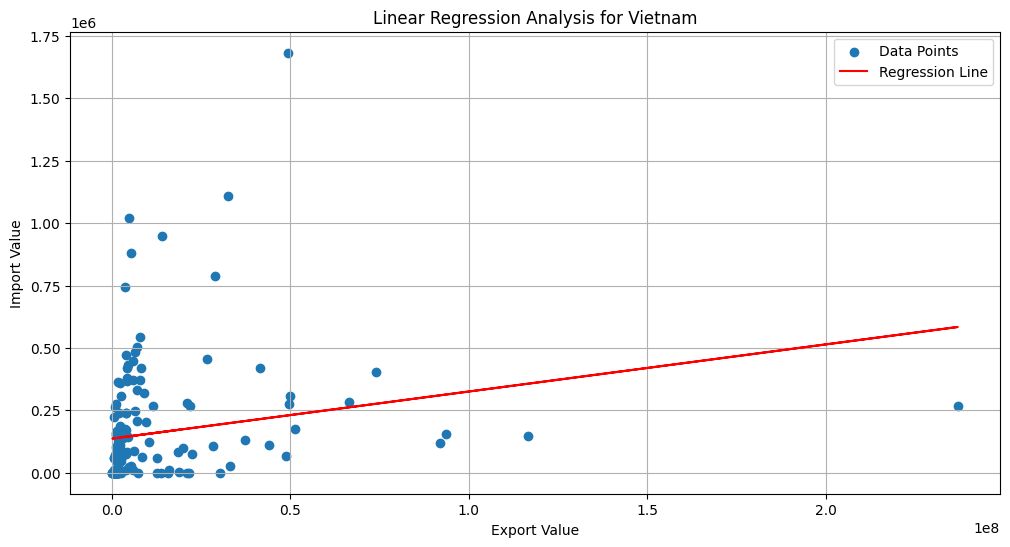

In [19]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Change to 'D' / '7D' / 'M' to affect granularity
TIME_METRIC = '7D'

weekly_export = export_combined_df['Value'].resample(TIME_METRIC).sum()

for country, import_data in import_group:
    weekly_import = import_data['Value'].resample(TIME_METRIC).sum()

    # Merge the export and import data for the specific country
    combined_weekly = pd.DataFrame({'Export_Value': weekly_export, 'Import_Value': weekly_import})
    combined_weekly.dropna(inplace=True)  # Dropping NaN values

    # Ensure there are enough data points
    if combined_weekly.shape[0] > 1:
        # Correlation Analysis
        pearson_corr, _ = pearsonr(combined_weekly['Export_Value'], combined_weekly['Import_Value'])
        spearman_corr, _ = spearmanr(combined_weekly['Export_Value'], combined_weekly['Import_Value'])
        print(f"Country: {country}")
        print(f"Pearson Correlation Coefficient: {pearson_corr}")
        print(f"Spearman Correlation Coefficient: {spearman_corr}")

        # Regression Analysis
        X = combined_weekly['Export_Value']
        y = combined_weekly['Import_Value']
        X = sm.add_constant(X)  # Add a constant term to the predictor
        model = sm.OLS(y, X).fit()
        predictions = model.predict(X)

        # Print out the statistics for each country
        # print(f"Linear Regression Model Summary for {country}:")
        # print(model.summary())

        # Plotting the linear regression
        plt.figure(figsize=(12, 6))
        plt.scatter(combined_weekly['Export_Value'], combined_weekly['Import_Value'], label='Data Points')
        plt.plot(combined_weekly['Export_Value'], predictions, color='red', label='Regression Line')
        plt.xlabel('Export Value')
        plt.ylabel('Import Value')
        plt.title(f'Linear Regression Analysis for {country}')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"Not enough data for correlation and regression analysis for {country}")


Granger Causality Test Results:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.0658  , p=0.0030  , df_denom=153, df_num=1
ssr based chi2 test:   chi2=9.2436  , p=0.0024  , df=1
likelihood ratio test: chi2=8.9801  , p=0.0027  , df=1
parameter F test:         F=9.0658  , p=0.0030  , df_denom=153, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=5.8716  , p=0.0035  , df_denom=150, df_num=2
ssr based chi2 test:   chi2=12.1345 , p=0.0023  , df=2
likelihood ratio test: chi2=11.6830 , p=0.0029  , df=2
parameter F test:         F=5.8716  , p=0.0035  , df_denom=150, df_num=2


c:\Users\manim\ONR\ONR-Price-Prediction\onr_price_prediction\venv\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\manim\AppData\Local\Temp\ipykernel_44556\2257954453.py:15: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  ccf = pd.Series(sm.tsa.stattools.ccf(combined_weekly['Export_Value'], combined_weekly['Import_Value'], unbiased=True))


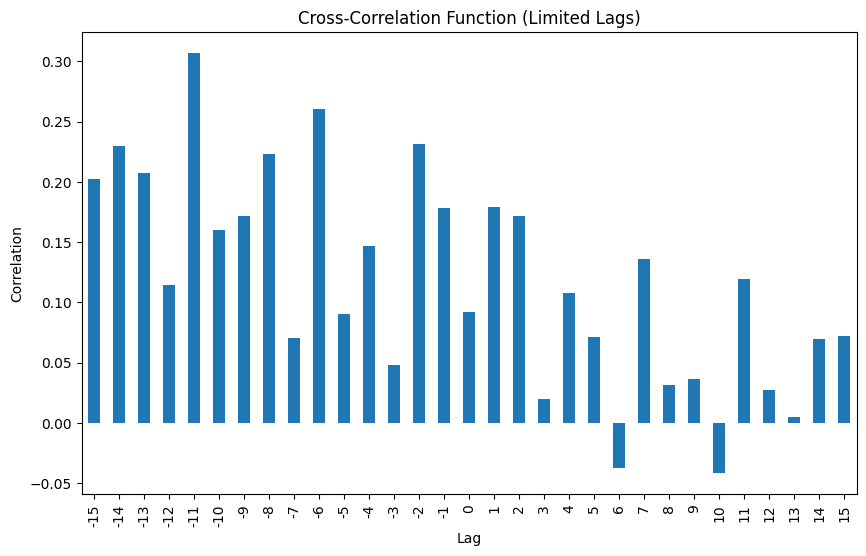

In [20]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Assuming weekly_export and weekly_import are already calculated as before

# Granger Causality Test
max_lag = 2  # Maximum number of lags to test for - can be adjusted
print("Granger Causality Test Results:")
granger_test_result = grangercausalitytests(combined_weekly, max_lag, verbose=True)

# Cross-Correlation Analysis
max_lags = 15  # Maximum lags in each direction
ccf = pd.Series(sm.tsa.stattools.ccf(combined_weekly['Export_Value'], combined_weekly['Import_Value'], unbiased=True))
ccf = ccf[:max_lags * 2 + 1]  # Keep only the first 2*max_lags+1 lags

# Plotting the Cross-Correlation Function
plt.figure(figsize=(10, 6))
ccf.plot(kind='bar')
plt.title('Cross-Correlation Function (Limited Lags)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.xticks(ticks=range(2 * max_lags + 1), labels=[f"{i-max_lags}" for i in range(2 * max_lags + 1)])
plt.show()
